In [1]:
import pandas as pd 
import numpy as np 
import os 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [3]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [5]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [6]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 주방/ 속옷 / 잡화 / 이미용 / 건강기능 

In [7]:
# 1. 주방 

In [8]:
#  1-1. 계절 별 취급액 /  월 별 취급액 변화 추이 

In [9]:
kitchen_raw = raw_data[raw_data['상품군'] == '주방']

In [10]:
kitchen_raw

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
20,21,2019-01-01 12:00:00,20.00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,33823000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,207.52,555
21,22,2019-01-01 12:20:00,20.00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,59083000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,235.50,970
22,23,2019-01-01 12:40:00,20.00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,99235000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,264.81,1629
79,80,2019-01-02 10:00:00,20.00,100448,202098,일시불 쿠첸 풀스텐 압력밥솥 10인용 (A1),주방,158000,7239000,20190102,...,1,2,수요일,Q1,2,겨울,20.00,0,146.02,46
80,81,2019-01-02 10:00:00,20.00,100448,202093,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,8951000,20190102,...,1,2,수요일,Q1,2,겨울,20.00,0,153.29,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


In [11]:
kitchen_raw.info
# 6567 행, 

<bound method DataFrame.info of        Unnamed: 0                방송일시  노출(분)    마더코드    상품코드  \
20             21 2019-01-01 12:00:00  20.00  100088  200236   
21             22 2019-01-01 12:20:00  20.00  100088  200236   
22             23 2019-01-01 12:40:00  20.00  100088  200236   
79             80 2019-01-02 10:00:00  20.00  100448  202098   
80             81 2019-01-02 10:00:00  20.00  100448  202093   
...           ...                 ...    ...     ...     ...   
35370       38296 2019-12-31 23:20:00  20.00  100448  201391   
35371       38297 2019-12-31 23:40:00  20.00  100448  201383   
35372       38298 2019-12-31 23:40:00  20.00  100448  201390   
35373       38299 2019-12-31 23:40:00  20.00  100448  201384   
35374       38300 2019-12-31 23:40:00  20.00  100448  201391   

                             상품명 상품군    판매단가       취급액        날짜  ...   월   일  \
20              에코라믹 통주물 스톤 냄비세트  주방   60900  33823000  20190101  ...   1   1   
21              에코라믹 통주물 스톤 냄비세트  주방 

In [12]:
# sales_by_season = kitchen_raw['상품명','판매단가','취급액','월','일','요일','계절','최소판매수량']

In [13]:
# sales_by_season_full = pd.DataFrame(kitchen_raw, columns =['상품명','판매단가','취급액','계절','최소판매수량'])

In [14]:
sales_by_season = pd.DataFrame(kitchen_raw, columns =['취급액','계절'])

In [15]:
sales_by_season

,취급액,계절
20,33823000,겨울
21,59083000,겨울
22,99235000,겨울
79,7239000,겨울
80,8951000,겨울
...,...,...
35370,1664000,겨울
35371,9149000,겨울
35372,15282000,겨울
35373,2328000,겨울


In [16]:
group_season = sales_by_season.groupby(['계절'])

In [17]:
sns.set(rc = {"figure.figsize": (14,6)})

In [18]:
flierprops = dict(marker = 'o', markersize = 5)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from c

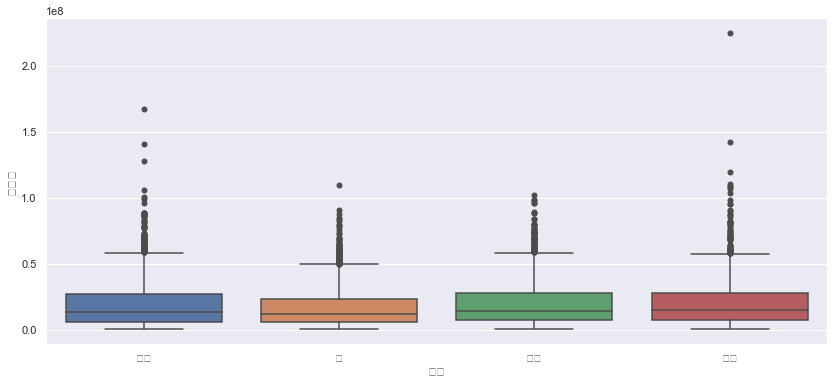

In [19]:
sns.boxplot(x = '계절', y='취급액',  data = sales_by_season, flierprops = flierprops)
plt.show()

In [20]:
season_sum = group_season['취급액'].sum()
season_mean = group_season['취급액'].mean()

In [21]:
season_sum

계절
가을    29203429000
겨울    36065434000
봄     30520601000
여름    30855573000
Name: 취급액, dtype: int64

In [22]:
season_sum_sort = pd.Series(season_sum, ('봄','여름','가을','겨울'))   # 봄 -> 여름 -> 가을 -> 겨울 순으로 정렬 

In [23]:
season_sum_sort

봄     30520601000
여름    30855573000
가을    29203429000
겨울    36065434000
Name: 취급액, dtype: int64

Text(0, 0.5, '취급액 총액')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44200 missing from c

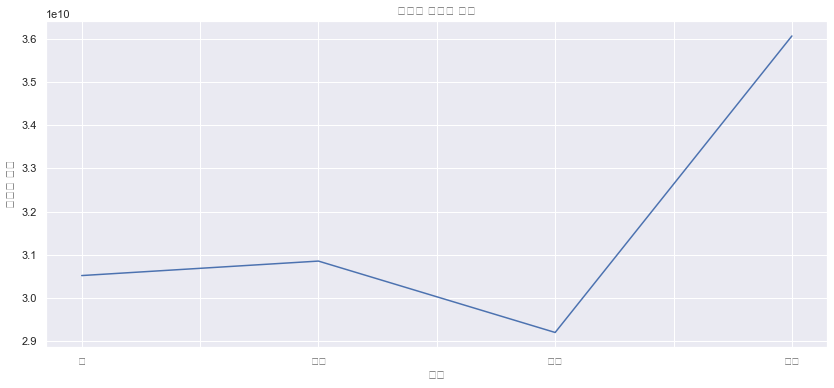

In [24]:
season_sum_sort.plot()
plt.title("계절별 취급액 총액")
plt.xlabel("계절")
plt.ylabel("취급액 총액")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from curre

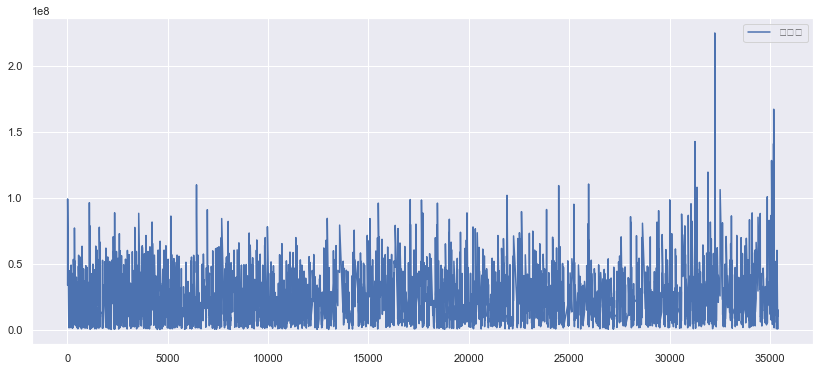

In [25]:
sales_by_season.plot()

# 계절별 취급액 평균 

In [26]:
season_mean

계절
가을   20565795.07
겨울   19348408.80
봄    17262783.37
여름   20366714.85
Name: 취급액, dtype: float64

In [27]:
type(season_mean)

pandas.core.series.Series

In [28]:
season_mean_sort = pd.Series(season_mean, ('봄','여름','가을','겨울'))   # 봄 -> 여름 -> 가을 -> 겨울 순으로 정렬 

In [29]:
season_mean_sort

봄    17262783.37
여름   20366714.85
가을   20565795.07
겨울   19348408.80
Name: 취급액, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44200 missing from c

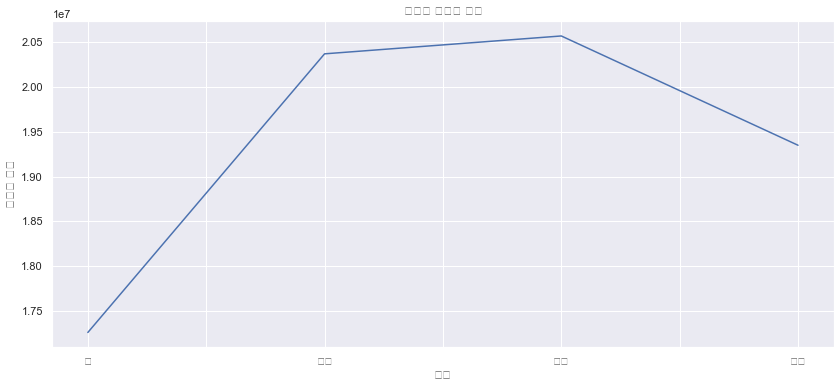

In [30]:
season_mean_sort.plot()
plt.title('계절별 취급액 평균') # 제목을 설정합니다. 
plt.ylabel('취급액 평균') # y 축의 라벨을 설정합니다. 
plt.xlabel('계절'); # x 축의 라벨을 설정합니다.

# 계절별 매진 여부


In [31]:
soldout_by_season = pd.DataFrame(kitchen_raw, columns =['매진여부','계절'])

In [32]:
kitchen_raw[kitchen_raw['매진여부'] == 1]

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
5692,5962,2019-03-03 12:20:00,12.13,100448,202097,일시불 쿠첸 풀스텐 압력밥솥 10인용,주방,158000,20502000,20190303,...,3,3,일요일,Q1,62,봄,40.00,1,185.20,130
5693,5964,2019-03-03 12:20:00,12.13,100448,202099,일시불 쿠첸 풀스텐 압력밥솥 6인용(A1),주방,148000,7496000,20190303,...,3,3,일요일,Q1,62,봄,40.00,1,147.19,51
5694,5965,2019-03-03 12:20:00,12.13,100448,202094,무이자 쿠첸 풀스텐 압력밥솥 6인용(A1),주방,158000,6280000,20190303,...,3,3,일요일,Q1,62,봄,40.00,1,141.34,40
8415,8881,2019-03-31 10:30:00,25.22,100117,200318,델첸 4in1 텀블러블랜더,주방,74800,33264000,20190331,...,3,31,일요일,Q1,90,봄,30.00,1,206.73,445
9406,10003,2019-04-09 07:30:00,22.37,100117,200318,델첸 4in1 텀블러블랜더,주방,74800,22415000,20190409,...,4,9,화요일,Q2,99,봄,30.00,1,188.99,300


In [33]:
group_soldout = soldout_by_season.groupby(['계절'])

In [34]:
group_soldout.sum()  # 

,매진여부
계절,
가을,0
겨울,0
봄,5
여름,0



# 계절별 판매 단가 평균 

In [35]:
unitprice_by_season =  pd.DataFrame(kitchen_raw, columns = ['판매단가','계절'])

In [36]:
unitprice_by_season

,판매단가,계절
20,60900,겨울
21,60900,겨울
22,60900,겨울
79,158000,겨울
80,168000,겨울
...,...,...
35370,148000,겨울
35371,178000,겨울
35372,168000,겨울
35373,158000,겨울


In [37]:
unitprice_group_season = unitprice_by_season.groupby("계절")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from c

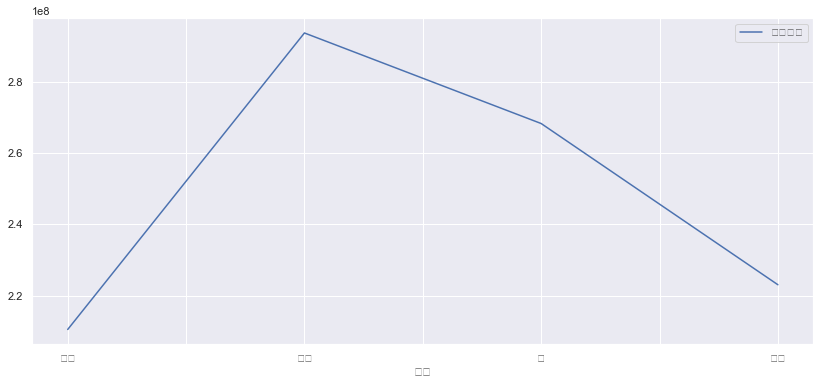

In [38]:
unitprice_group_season.sum().plot()

In [39]:
unitprice_group_mean = unitprice_group_season.mean()

In [40]:
type(unitprice_group_mean)
unitprice_group_mean


,판매단가
계절,
가을,148289.44
겨울,157519.15
봄,151726.30
여름,147260.92


In [41]:
unitprice_group_season_sort = pd.DataFrame(unitprice_group_mean, ("봄", "여름","가을","겨울"))

Text(0.5, 1.0, '계절별 판매단가 평균')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44200 missing from c

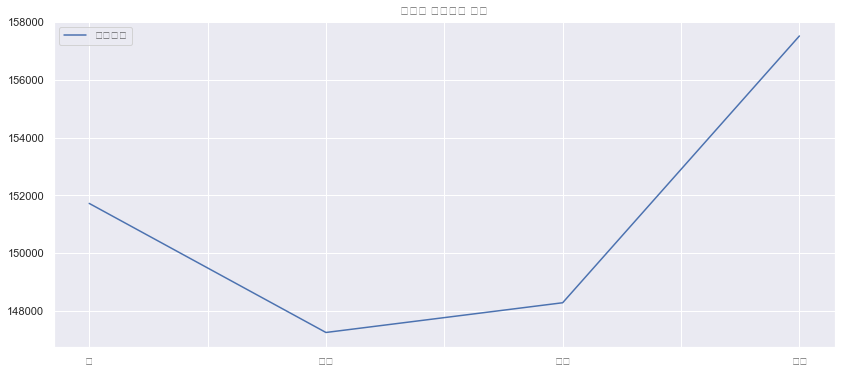

In [42]:
unitprice_group_season_sort.plot()
plt.title("계절별 판매단가 평균")

# 계절별 상품명 수  (보류) 


# 계절별 최소판매수량 총합 / 평균


In [43]:
quantity_season =  pd.DataFrame(kitchen_raw, columns = ["계절","최소판매수량"])

In [44]:
quantity_season

,계절,최소판매수량
20,겨울,555
21,겨울,970
22,겨울,1629
79,겨울,46
80,겨울,53
...,...,...
35370,겨울,11
35371,겨울,51
35372,겨울,91
35373,겨울,15


In [45]:
quantity_season_group = quantity_season.groupby("계절")

In [46]:
quantity_group_sum  = quantity_season_group.sum()   # 데이터프레임 
quantity_group_mean = quantity_season_group.mean()

In [47]:
df_quantity_groupSUM = pd.DataFrame(quantity_group_sum, ("봄","여름","가을","겨울"))
df_quantity_groupMEAN = pd.DataFrame(quantity_group_mean, ("봄","여름","가을","겨울"))

Text(0.5, 1.0, '계절별 최소판매수량 평균')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44200 missing from c

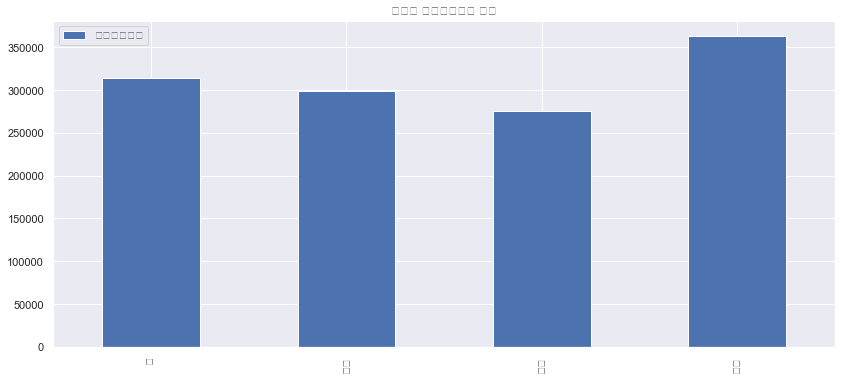

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)


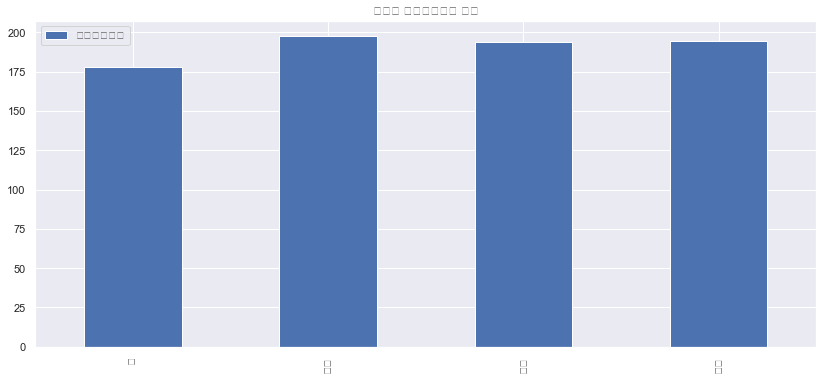

In [48]:
df_quantity_groupSUM.plot.bar()
plt.title("계절별 최소판매수량 합계")

df_quantity_groupMEAN.plot.bar()
plt.title("계절별 최소판매수량 평균")

#  1-2. 분기

#  분기 별 취급액  총액 / 평균 

In [49]:
sales_by_Q = pd.DataFrame(kitchen_raw, columns = ("분기", "취급액")  )

In [50]:
sales_by_Q 

,분기,취급액
20,Q1,33823000
21,Q1,59083000
22,Q1,99235000
79,Q1,7239000
80,Q1,8951000
...,...,...
35370,Q4,1664000
35371,Q4,9149000
35372,Q4,15282000
35373,Q4,2328000


In [51]:
sales_by_Q_group = sales_by_Q.groupby("분기")

In [52]:
Q_group_sum  = sales_by_Q_group.sum()
Q_group_mean = sales_by_Q_group.mean()


Text(0.5, 1.0, '분기별 취급액 평균')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from c

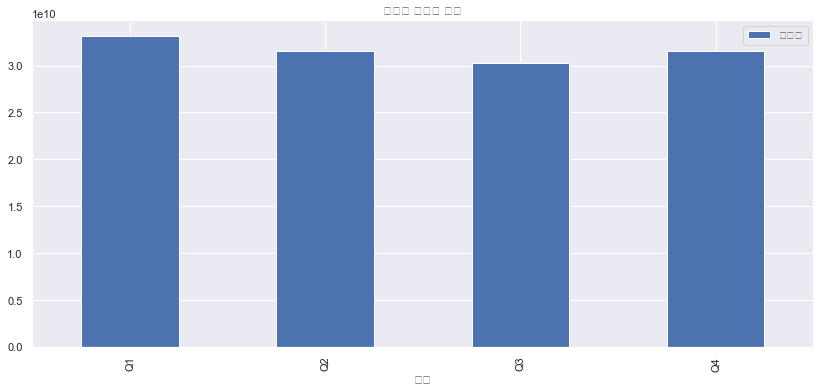

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)


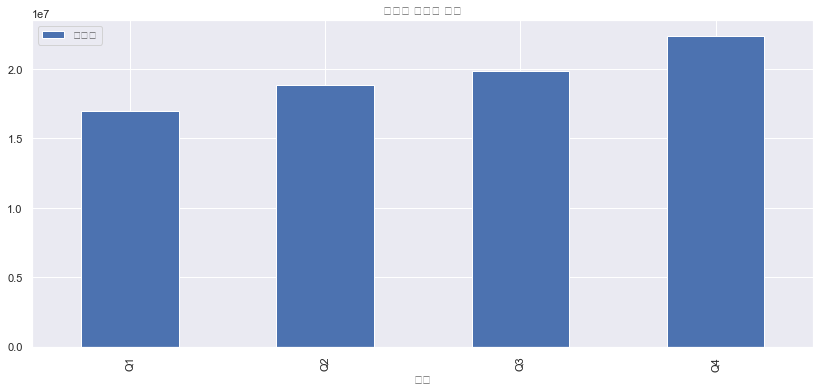

In [53]:
Q_group_sum.plot.bar()
plt.title("분기별 취급액 총합")
Q_group_mean.plot.bar()
plt.title("분기별 취급액 평균")

# 분기별 매진 여부 

### 전부 3,4 월 -> 1분기 5건 이므로 생략 

#  분기별 판매 단가 평균


In [54]:
unitprice_by_Q =  pd.DataFrame(kitchen_raw, columns = ['판매단가','분기'])

In [55]:
unitprice_by_Q

,판매단가,분기
20,60900,Q1
21,60900,Q1
22,60900,Q1
79,158000,Q1
80,168000,Q1
...,...,...
35370,148000,Q4
35371,178000,Q4
35372,168000,Q4
35373,158000,Q4


In [56]:
# unitprice_by_Q_season = unitprice_by_Q.groupby("분기")

In [57]:
# unitprice_by_Q_SUM= unitprice_by_Q_season.sum()
# unitprice_by_Q_MEAN= unitprice_by_Q_season.mean()

Text(0.5, 1.0, '분기별 판매 단가 평균')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from c

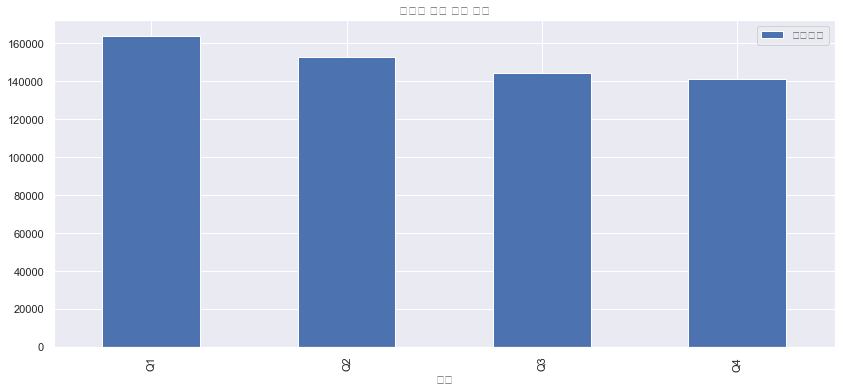

In [58]:
# # unitprice_by_Q_SUM.plot()
# # plt.title("분기별 판매 단가 하")
# unitprice_by_Q_MEAN.plot.bar()
# plt.title("분기별 판매 단가 평균")

# 분기별 상품명 수 (보류 )

# 분기별 최소판매수량 총합 / 평균 

In [59]:
quantity_Q =  pd.DataFrame(kitchen_raw, columns = ["분기","최소판매수량"])

In [60]:
quantity_Q

,분기,최소판매수량
20,Q1,555
21,Q1,970
22,Q1,1629
79,Q1,46
80,Q1,53
...,...,...
35370,Q4,11
35371,Q4,51
35372,Q4,91
35373,Q4,15


In [61]:
quantity_Q_group = quantity_season_Q.groupby("분기")

NameError: name 'quantity_season_Q' is not defined

In [ ]:
quantity_Q_group_sum  = quantity_Q_group.sum()   # 데이터프레임 
quantity_Q_group_mean = quantity_Q_group.mean()

In [ ]:
quantity_Q_group_sum.plot.bar()
plt.title("분기별 최소판매수량 합계")
quantity_Q_group_mean.plot.bar()
plt.title("분기별 최소판매수량 평균")

# 1-0. 시계열 (월별, 시간대별 )

In [ ]:
kitchen_raw

# 월별 취급액 총합 / 평균 

In [ ]:
sales_by_month = pd.DataFrame(kitchen_raw, columns = ("월","취급액"))

In [ ]:
sales_by_month

In [ ]:
sales_by_month_group = sales_by_month.groupby("월")

In [ ]:
sales_by_month_group_SUM= sales_by_month_group.sum()
sales_by_month_group_MEAN=  sales_by_month_group.mean() 

In [ ]:
sales_by_month_group_SUM.plot()
plt.title("월별 취급액 합계")
plt.xticks(np.arange(1,13,1))

sales_by_month_group_MEAN.plot()
plt.title("월별 취급액 평균")
plt.xticks(np.arange(1,13,1))

# 시간대별 취급액 총합 / 평균 

In [ ]:
sales_by_hhmm = pd.DataFrame(kitchen_raw, columns = ("시간","취급액"))

In [ ]:
sales_by_hhmm

In [ ]:
sales_by_hhmm_group = sales_by_hhmm.groupby("시간")

In [ ]:
sales_by_time_SUM = sales_by_hhmm_group.sum()
sales_by_time_MEAN= sales_by_hhmm_group.mean()

In [ ]:
sales_by_time_SUM.plot()
plt.title("시간대 별 취급액 총합")
# plt.xticks(np.arange(0,24,1))



sales_by_time_MEAN.plot()
plt.title("시간대 별 취급액 평균")

In [ ]:
##################### 새로운 버젼 ###################

In [62]:
from timeseries_graph_functions import *  # 시각화용 함수 만든것 불러오기 

In [63]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [64]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [65]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [66]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [67]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 상품군 : 주방


In [68]:
kitchen_raw = raw_data[raw_data['상품군'] == '주방']

In [69]:
focus_data = kitchen_raw

In [73]:
focus_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 20 to 35374
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  6567 non-null   int64         
 1   방송일시        6567 non-null   datetime64[ns]
 2   노출(분)       6567 non-null   float64       
 3   마더코드        6567 non-null   int64         
 4   상품코드        6567 non-null   int64         
 5   상품명         6567 non-null   object        
 6   상품군         6567 non-null   object        
 7   판매단가        6567 non-null   int64         
 8   취급액         6567 non-null   int64         
 9   날짜          6567 non-null   int64         
 10  시간          6567 non-null   object        
 11  월           6567 non-null   int64         
 12  일           6567 non-null   int64         
 13  요일          6567 non-null   object        
 14  분기          6567 non-null   object        
 15  365일        6567 non-null   int64         
 16  계절          6567 non-n

In [74]:
focus_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
20,21,2019-01-01 12:00:00,20.00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,33823000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,207.52,555
21,22,2019-01-01 12:20:00,20.00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,59083000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,235.50,970
22,23,2019-01-01 12:40:00,20.00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,99235000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,264.81,1629
79,80,2019-01-02 10:00:00,20.00,100448,202098,일시불 쿠첸 풀스텐 압력밥솥 10인용 (A1),주방,158000,7239000,20190102,...,1,2,수요일,Q1,2,겨울,20.00,0,146.02,46
80,81,2019-01-02 10:00:00,20.00,100448,202093,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,8951000,20190102,...,1,2,수요일,Q1,2,겨울,20.00,0,153.29,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


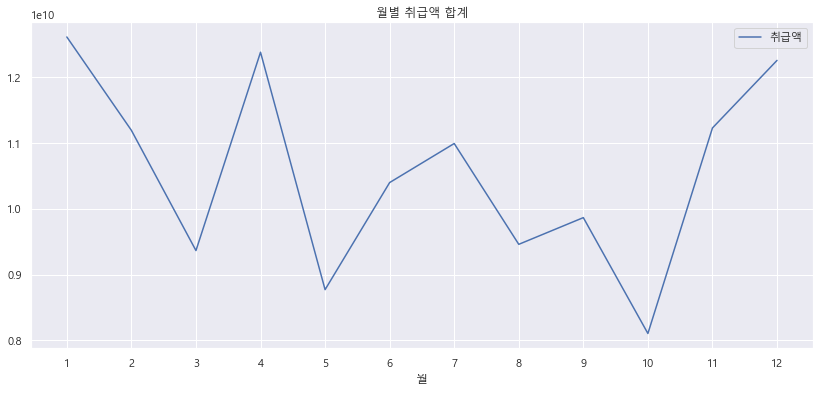

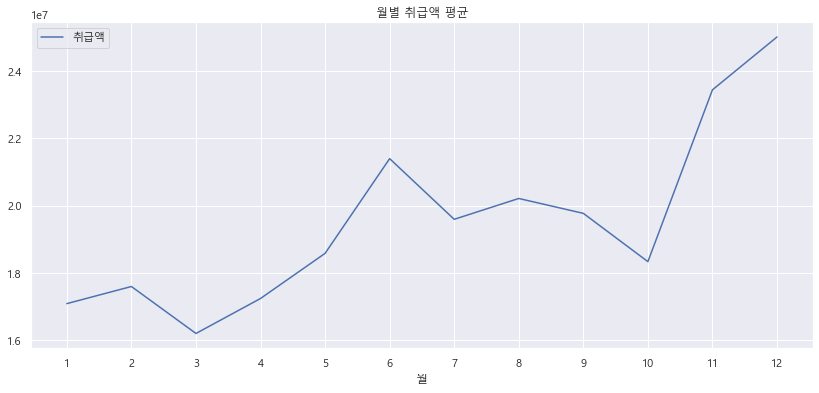

In [75]:
sales_by_month(focus_data)

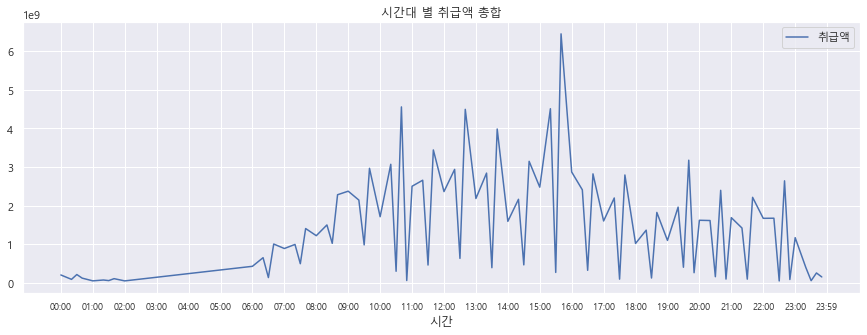

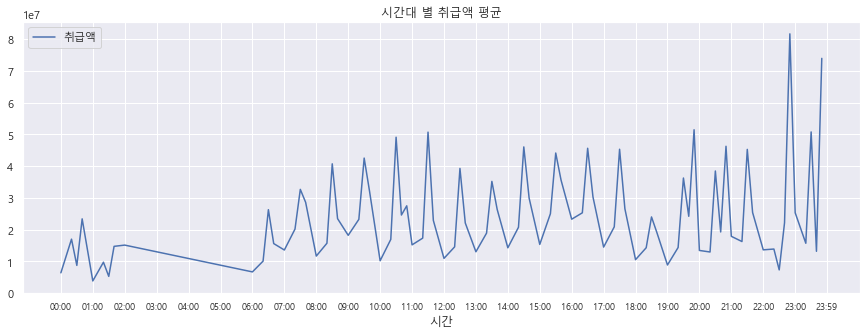

In [77]:
sales_by_time(focus_data)

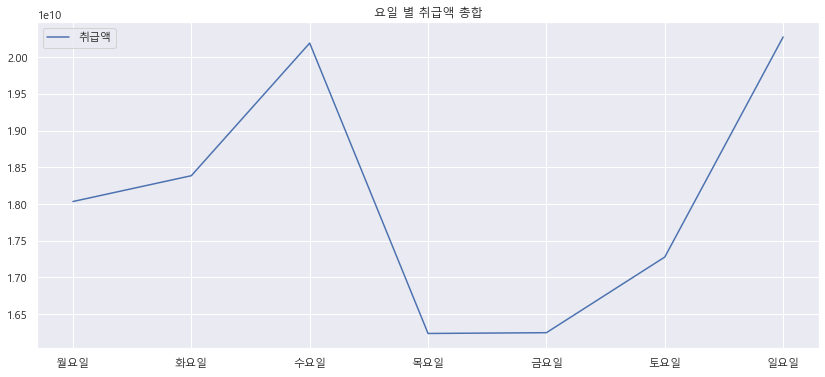

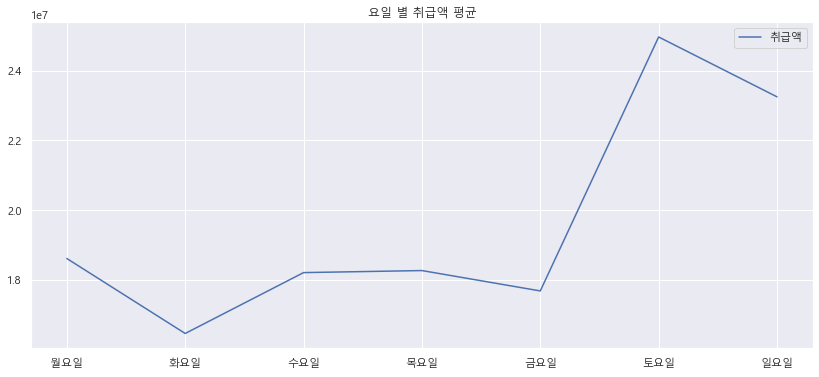

In [78]:
sales_by_yoill(focus_data)

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 총합')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 평균')


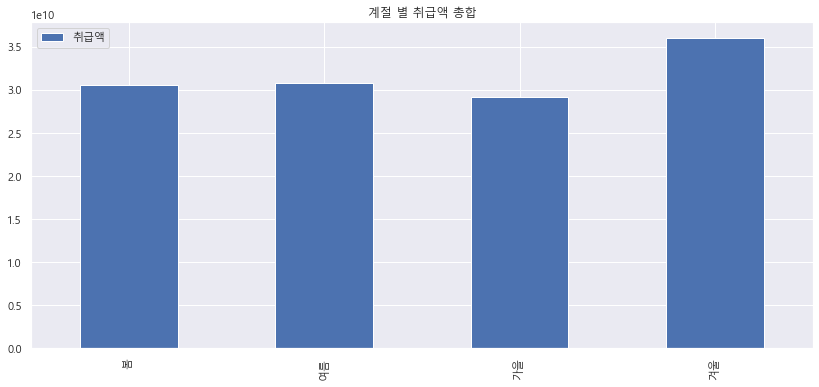

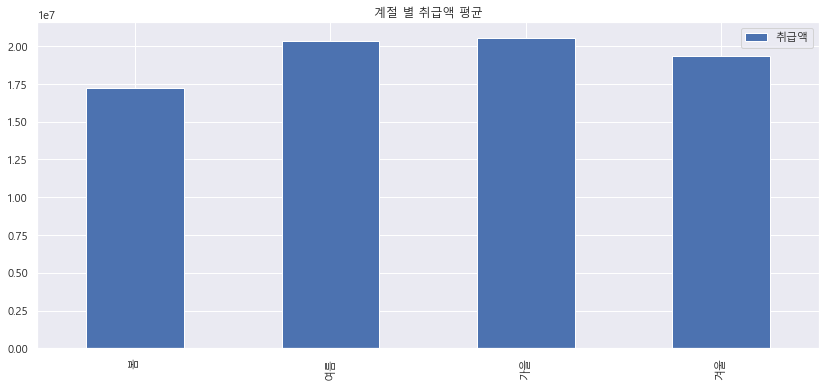

In [79]:
sales_by_season(focus_data)

In [80]:
soldout_by_season(focus_data)

    매진여부
계절      
가을     0
겨울     0
봄      5
여름     0


AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 총액')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 평균')


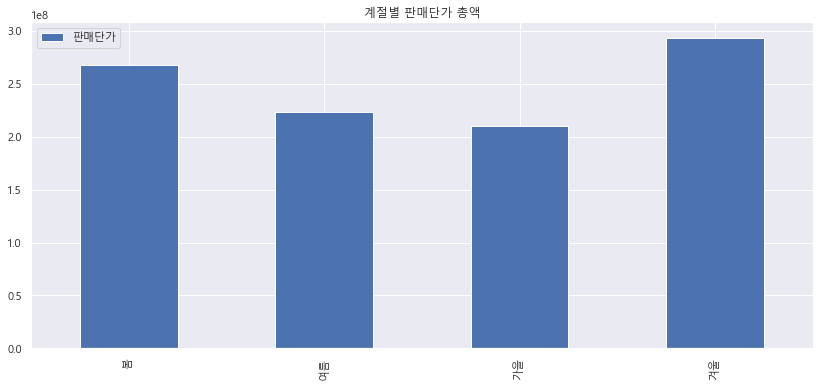

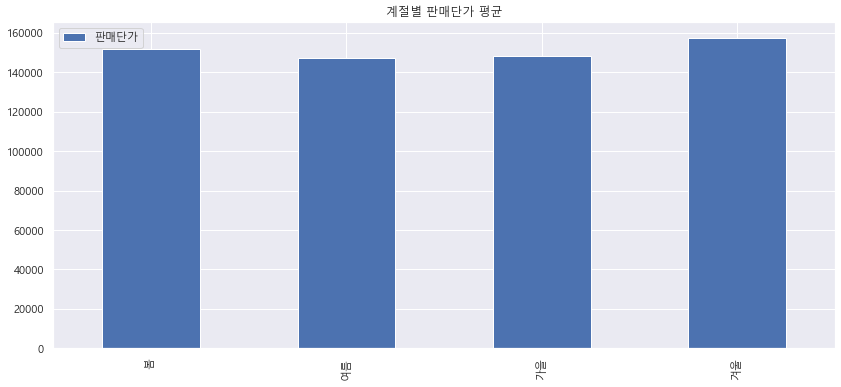

In [81]:
unitprice_by_season(focus_data)

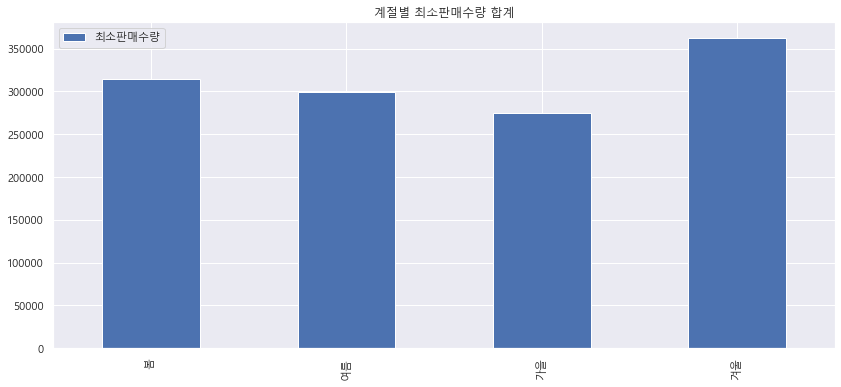

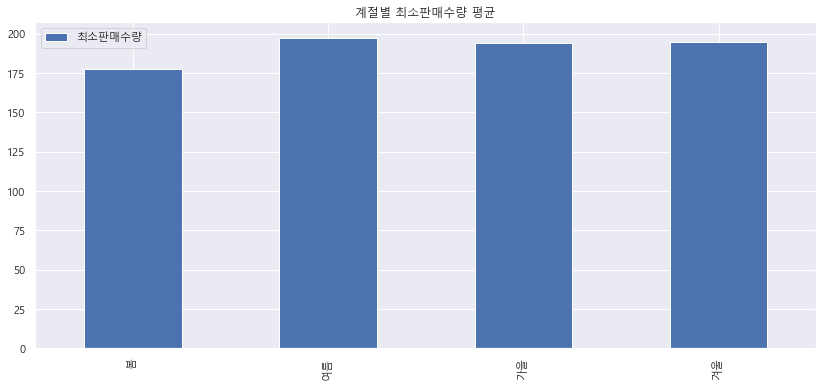

In [82]:
quantity_by_season(focus_data)

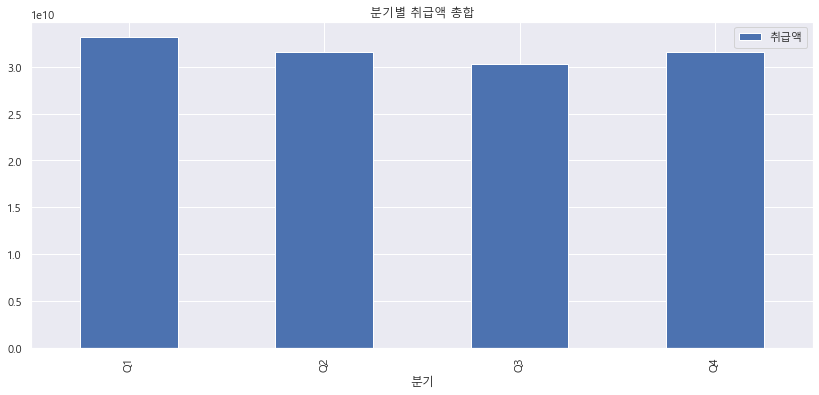

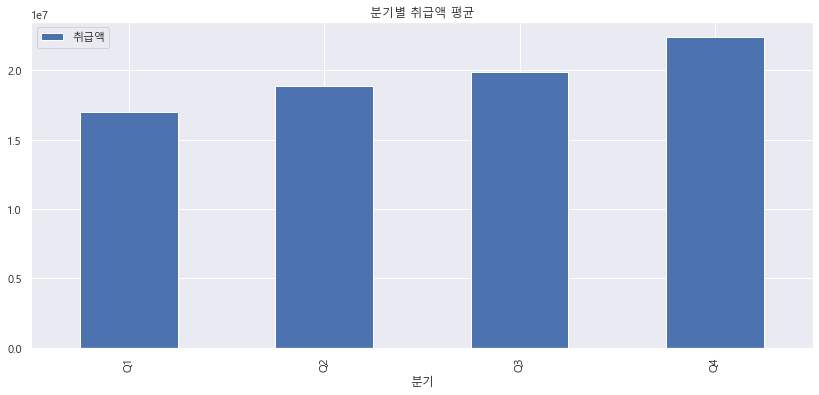

In [83]:
sales_by_Q(focus_data)

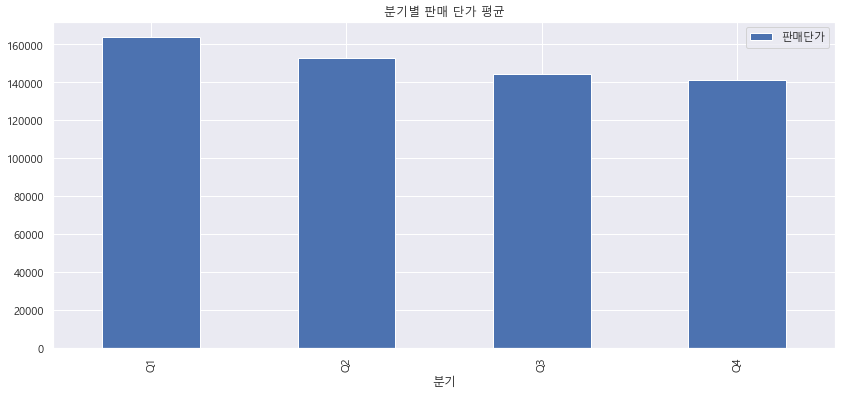

In [84]:
unitprice_by_Q(focus_data)

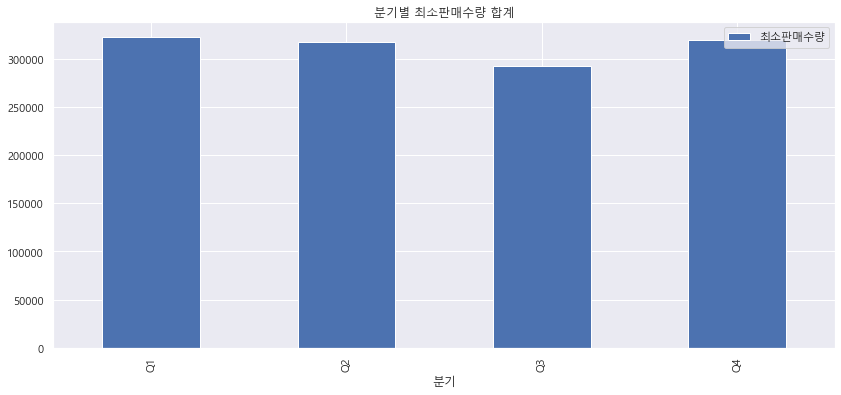

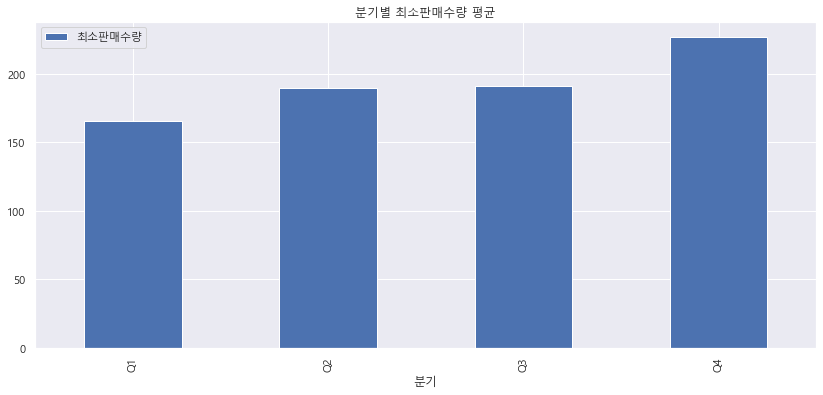

In [85]:
quantity_by_Q(focus_data)